In [2]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random
import numpy.linalg
import scipy.io
import scipy.stats
import sklearn.metrics
from IPython import get_ipython

%matplotlib notebook


def nextplot():
    inNotebook = "IPKernelApp" in get_ipython().config
    if inNotebook:
        plt.figure()  # this creates a new plot
    else:
        plt.clf()  # and this clears the current one

# Load the data

In [3]:
data = scipy.io.loadmat("data/spamData.mat") # matlab data type
X = data["Xtrain"]
N = X.shape[0]
D = X.shape[1]

print(N) # examples (3065)
print(D) # features (57)

Xtest = data["Xtest"]
Ntest = Xtest.shape[0]
y = data["ytrain"].squeeze().astype(int)
ytest = data["ytest"].squeeze().astype(int)

features = np.array(
    [
        "word_freq_make",
        "word_freq_address",
        "word_freq_all",
        "word_freq_3d",
        "word_freq_our",
        "word_freq_over",
        "word_freq_remove",
        "word_freq_internet",
        "word_freq_order",
        "word_freq_mail",
        "word_freq_receive",
        "word_freq_will",
        "word_freq_people",
        "word_freq_report",
        "word_freq_addresses",
        "word_freq_free",
        "word_freq_business",
        "word_freq_email",
        "word_freq_you",
        "word_freq_credit",
        "word_freq_your",
        "word_freq_font",
        "word_freq_000",
        "word_freq_money",
        "word_freq_hp",
        "word_freq_hpl",
        "word_freq_george",
        "word_freq_650",
        "word_freq_lab",
        "word_freq_labs",
        "word_freq_telnet",
        "word_freq_857",
        "word_freq_data",
        "word_freq_415",
        "word_freq_85",
        "word_freq_technology",
        "word_freq_1999",
        "word_freq_parts",
        "word_freq_pm",
        "word_freq_direct",
        "word_freq_cs",
        "word_freq_meeting",
        "word_freq_original",
        "word_freq_project",
        "word_freq_re",
        "word_freq_edu",
        "word_freq_table",
        "word_freq_conference",
        "char_freq_;",
        "char_freq_(",
        "char_freq_[",
        "char_freq_!",
        "char_freq_$",
        "char_freq_#",
        "capital_run_length_average",
        "capital_run_length_longest",
        "capital_run_length_total", # shouldn't this be something else..?
    ]
)

3065
57


# 1. Dataset Statistics

In [4]:
# look some dataset statistics
# statistics in this case are minmax, sum, mean, variance, skewness, kurtosis
scipy.stats.describe(X)

DescribeResult(nobs=3065, minmax=(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1.]), array([4.5400e+00, 1.4280e+01, 5.1000e+00, 4.2810e+01, 9.0900e+00,
       3.5700e+00, 7.2700e+00, 1.1110e+01, 3.3300e+00, 1.8180e+01,
       2.0000e+00, 9.6700e+00, 5.5500e+00, 5.5500e+00, 2.8600e+00,
       1.0160e+01, 7.1400e+00, 9.0900e+00, 1.8750e+01, 6.3200e+00,
       1.1110e+01, 1.7100e+01, 5.4500e+00, 9.0900e+00, 2.0000e+01,
       1.4280e+01, 3.3330e+01, 4.7600e+00, 1.4280e+01, 4.7600e+00,
       4.7600e+00, 4.7600e+00, 1.8180e+01, 4.7600e+00, 2.0000e+01,
       7.6900e+00, 6.8900e+00, 7.4000e+00, 9.7500e+00, 4.7600e+00,
       7.1400e+00, 1.4280e+01, 3.5700e+00, 2.0000e+01, 2.1420e+01,
       1.6700e+01, 2.1200e+00, 1.0000e+01, 4.3850e+00, 9.7520e+00,
       4.0810e+00, 3.2478e+01, 6.0030e

In [5]:
scipy.stats.describe(y) # same stats as above for y

DescribeResult(nobs=3065, minmax=(0, 1), mean=0.39738988580750406, variance=0.23954932085067238, skewness=0.41936632478193103, kurtosis=-1.824131885638896)

## Absolute and relative values together

<IPython.core.display.Javascript object>


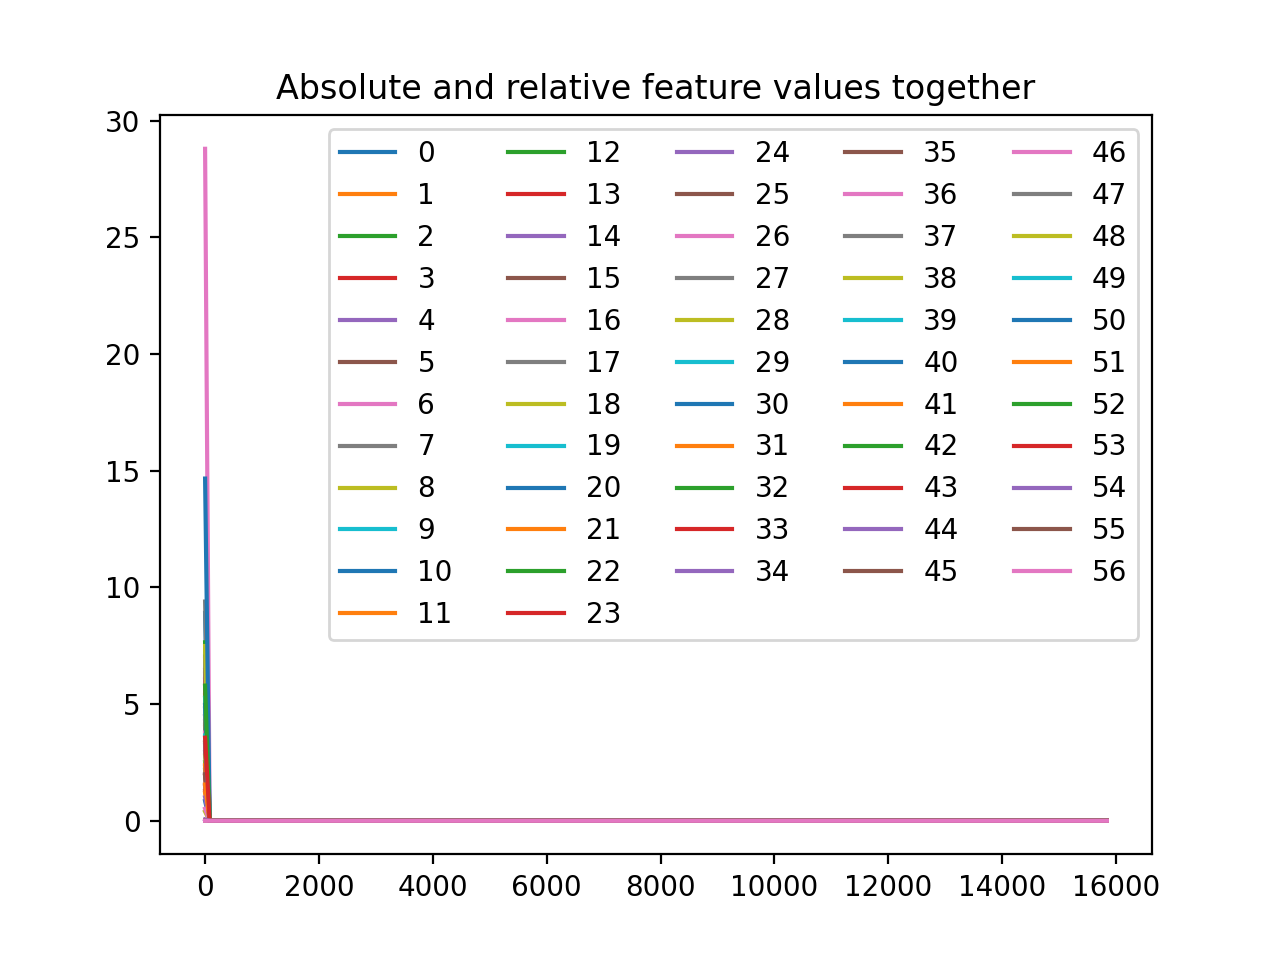

Text(0.5, 1.0, 'Absolute and relative feature values together')

In [6]:
# plot the distribution of all features
nextplot()
densities = [scipy.stats.gaussian_kde(X[:, j]) for j in range(D)]
xs = np.linspace(0, np.max(X), 200)
for j in range(D):
    plt.plot(xs, densities[j](xs), label=j)
plt.legend(ncol=5)
plt.title('Absolute and relative feature values together')

## only absolute values

<IPython.core.display.Javascript object>


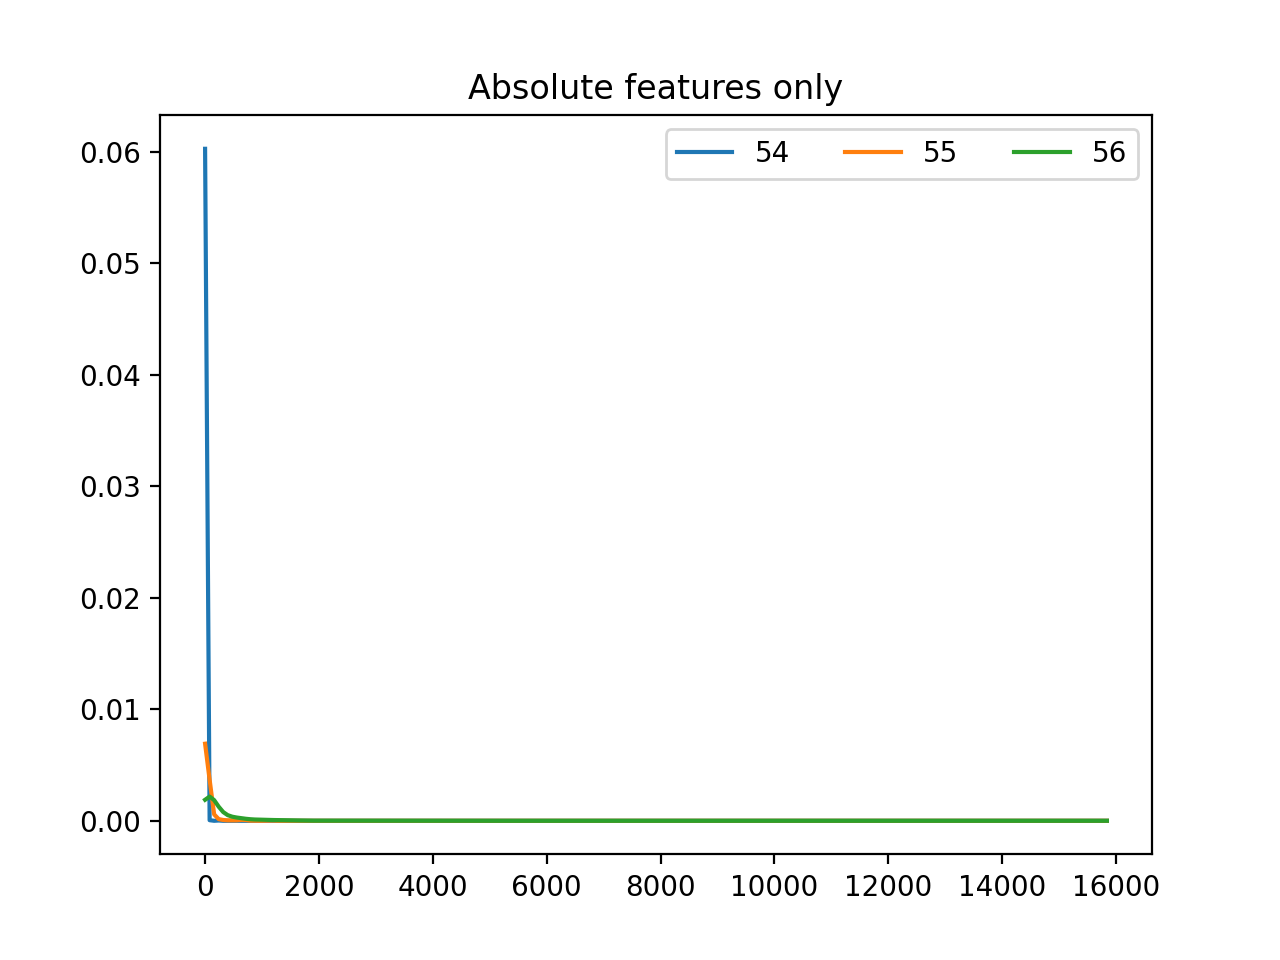

Text(0.5, 1.0, 'Absolute features only')

In [7]:
# plot the distribution of all features (all absolute values)
nextplot()
densities = [scipy.stats.gaussian_kde(X[:, j]) for j in range(D)]
xs = np.linspace(0, np.max(X), 200)
for j in range(D-3, D):
    plt.plot(xs, densities[j](xs), label=j)
plt.legend(ncol=5)
plt.title('Absolute features only')

## All relative values

<IPython.core.display.Javascript object>


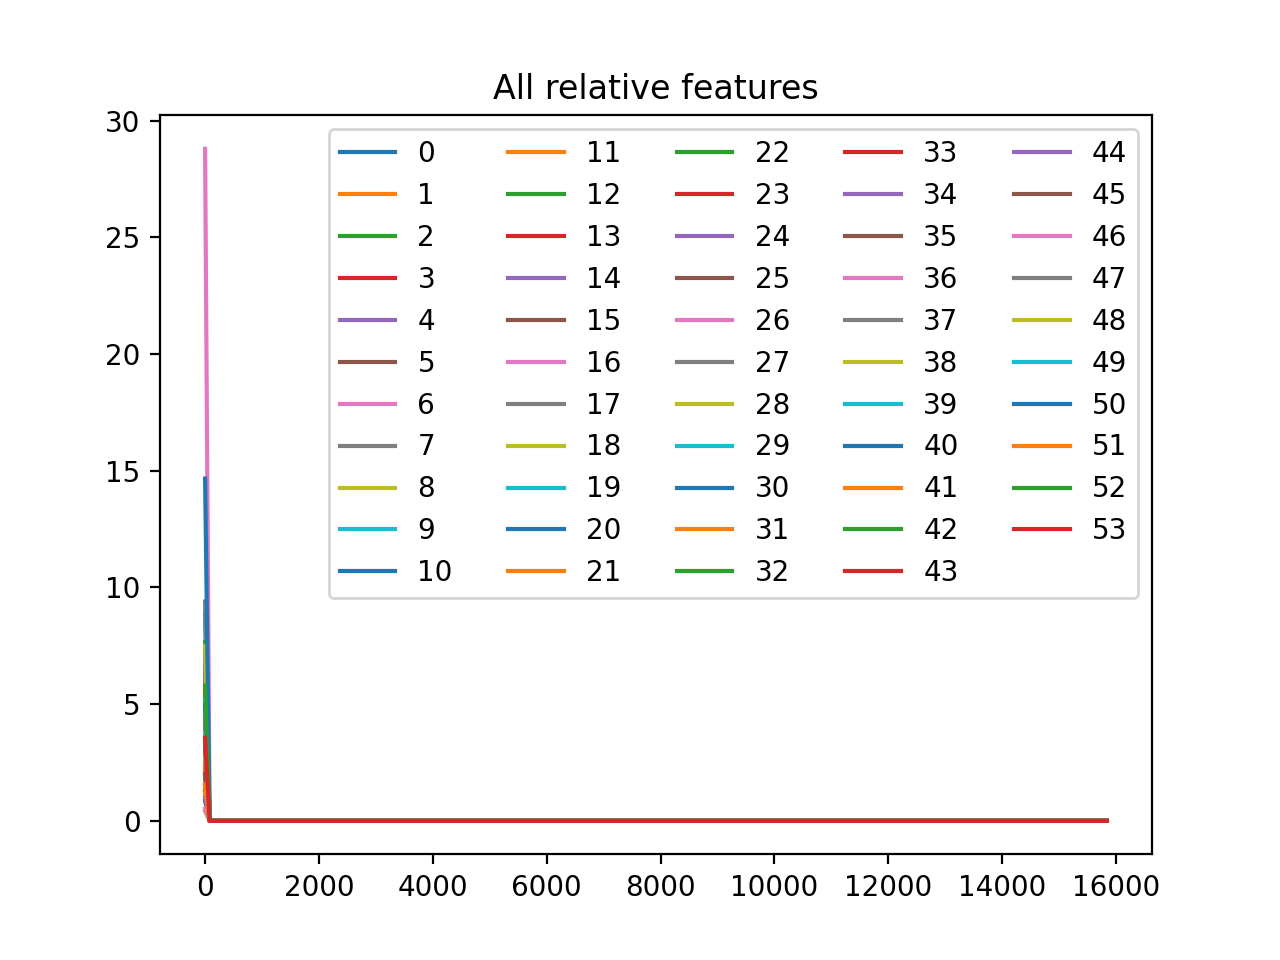

Text(0.5, 1.0, 'All relative features')

In [8]:
# plot the distribution of all features (all relative values)
nextplot()
densities = [scipy.stats.gaussian_kde(X[:, j]) for j in range(D-3)]
xs = np.linspace(0, np.max(X), 200)
for j in range(D-3):
    plt.plot(xs, densities[j](xs), label=j)
plt.legend(ncol=5)
plt.title('All relative features')

<IPython.core.display.Javascript object>


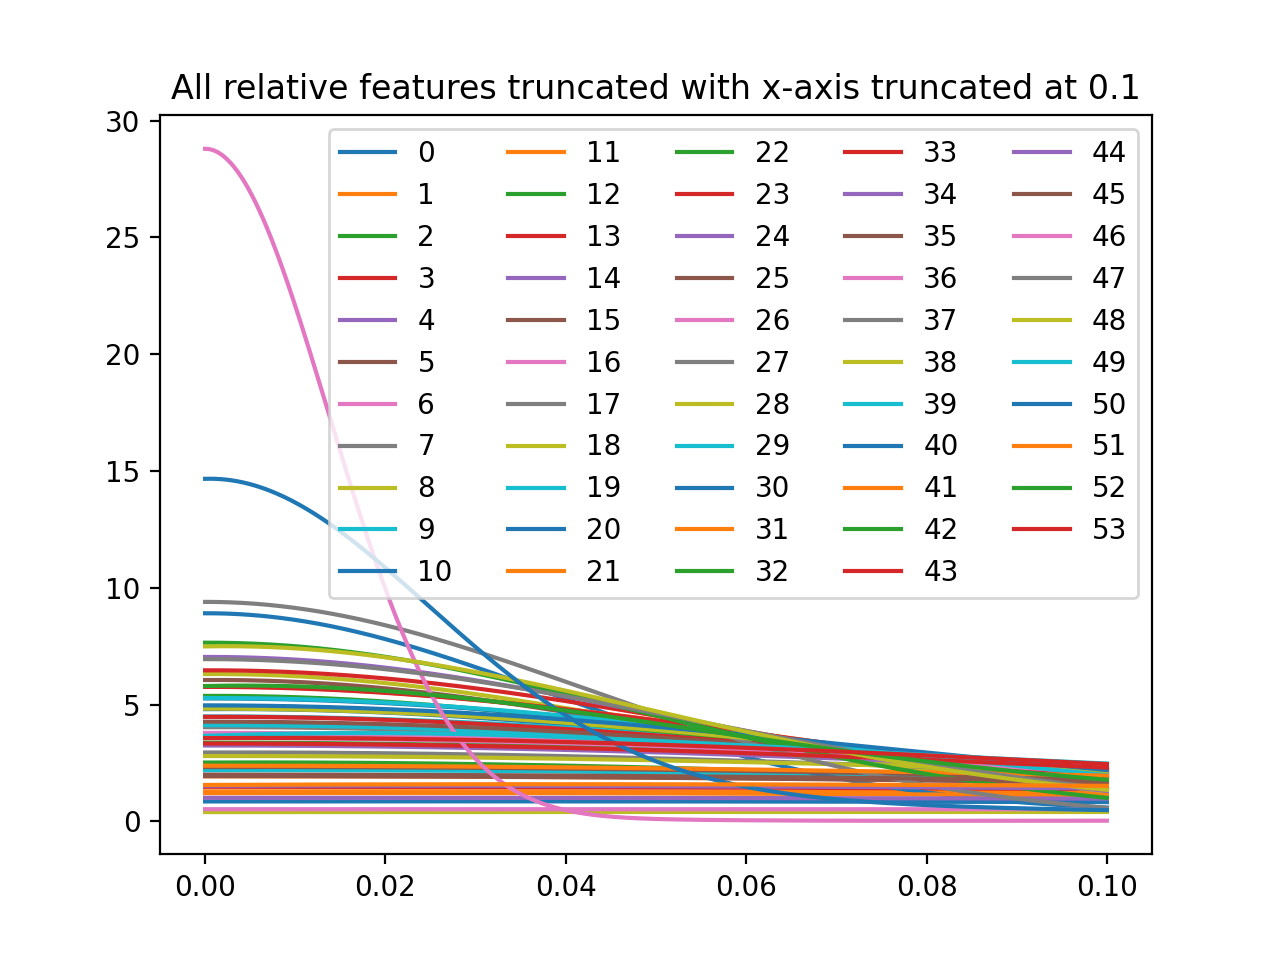

Text(0.5, 1.0, 'All relative features truncated with x-axis truncated at 0.1')

In [10]:
# this plots is not really helpful; go now explore further
nextplot()
densities = [scipy.stats.gaussian_kde(X[:, j]) for j in range(D-3)]
xs = np.linspace(0, 0.1, 500) # changing the x axis scale: most of the density is between 0 and 0.4

# print(np.argmax(X)/57)
# print(np.argmax(X[1005, :]))
# print((X[1005,56])) <- index of max feature value in traom
for j in range(D-3):
    plt.plot(xs, densities[j](xs), label=j) # or features[j]
plt.legend(ncol=5)
plt.title('All relative features truncated with x-axis truncated at 0.1')

<IPython.core.display.Javascript object>


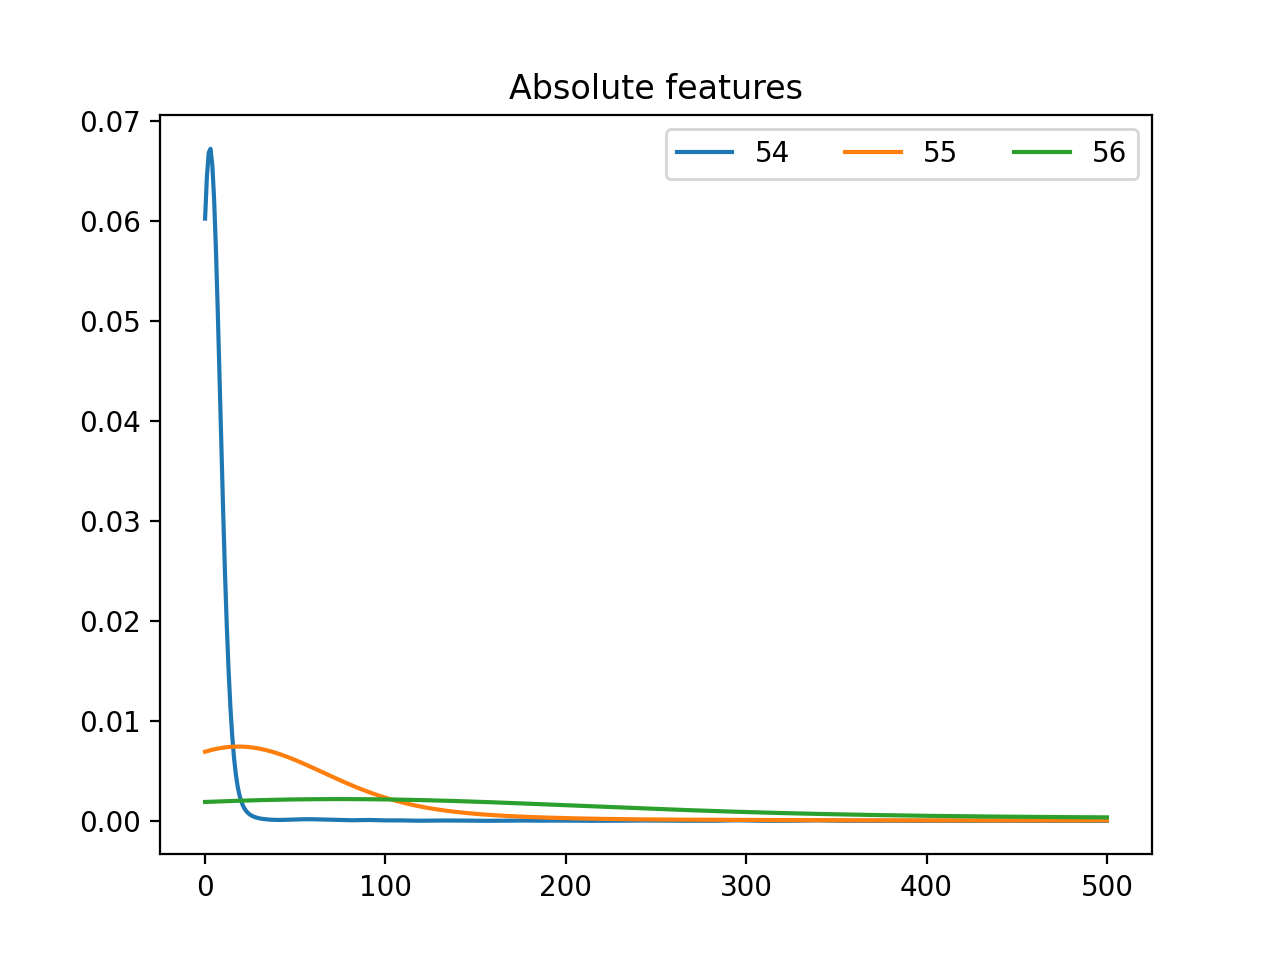

Text(0.5, 1.0, 'Absolute features')

In [12]:
# this plots is not really helpful; go now explore further
nextplot()
densities = [scipy.stats.gaussian_kde(X[:, j]) for j in range(D)]

xs = np.linspace(0, 500, 500) # changing the x axis scale: most of the density is between 0 and 0.4

# print(np.argmax(X)/57)
# print(np.argmax(X[1005, :]))
# print((X[1005,56])) <- index of max feature value in traom
for j in range(D-3, D):
    plt.plot(xs, densities[j](xs), label=j) # or j
plt.legend(ncol=5)
plt.title('Absolute features')

In [13]:
# Let's compute z-scores; create two new variables Xz and Xtestz.
#Xz = np.zeros(X.shape)

#Xz = scipy.stats.zscore(X)
#for i in range(len(X[0, :])):
    # mean = np.mean(X[:,i])
    # stddev = np.std(X[:,i])
    #Xz[:, i] = [((x-mean)/stddev) for x in X[:, i]] # alternative: scipy.stats.zscore
#    Xz[:, i] = scipy.stats.zscore(X[:, i])

Xz = (X - np.mean(X, axis=0))/np.std(X, axis=0)
# Xz = scipy.stats.zscore(X)


#Xtestz = np.zeros(Xtest.shape)

Xtestz = (Xtest - X.mean(axis=0))/X.std(axis=0)

#for i in range(len(Xtest[0, :])): 
    # mean = np.mean(X[:,i])
    # stddev = np.std(X[:,i])
    #Xz[:, i] = [((x-mean)/stddev) for x in X[:, i]] # alternative: scipy.stats.zscore
    
 #   Xtestz[:, i] = scipy.stats.zscore(Xtest[:, i])


In [14]:
# Let's check. Xz and Xtestz refer to the normalized datasets just created. We
# will use them throughout.
np.mean(Xz, axis=0)  # should be all 0 --> is close to zero 
np.var(Xz, axis=0)  # should be all 1 --> yup, equal to 1
np.mean(Xtestz, axis=0)  # what do you get here? --> as we are normalising using the training sets'
                         # mean and std. dev., we are not getting 
np.var(Xtestz, axis=0)

np.sum(Xz ** 3)  # should be: 1925261.15

1925261.1560010156

## Plotting normalised data

<IPython.core.display.Javascript object>


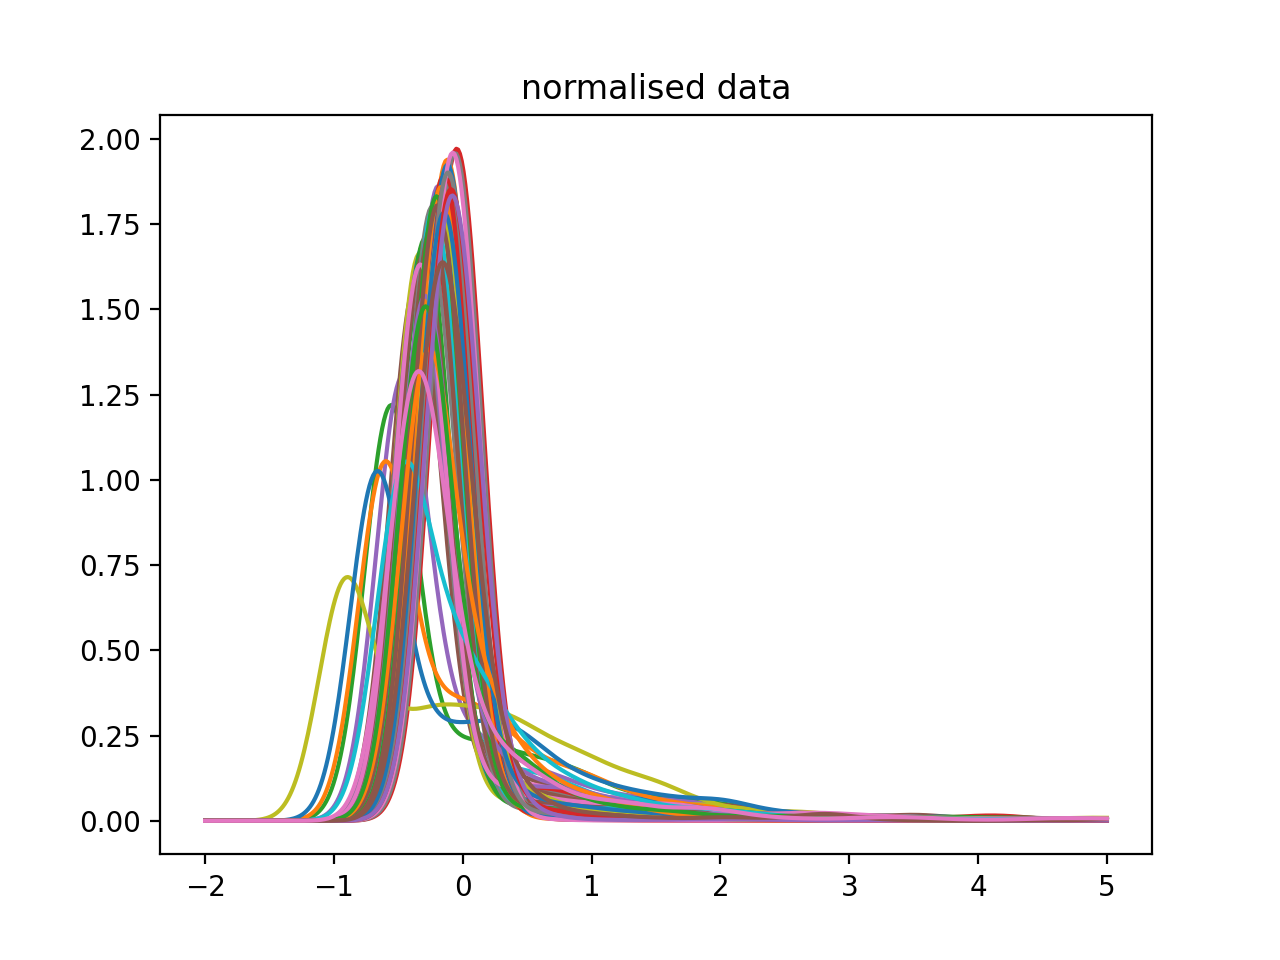

Text(0.5, 1.0, 'normalised data')

In [16]:
# Explore the normalized data
# comment by myself: there are outliers, inspect later in more detail (two different scales (relative and absolute))
# now everything is on one scale
# is right-skewed
nextplot()
densities = [scipy.stats.gaussian_kde(Xz[:, j]) for j in range(D)]
xs = np.linspace(-2, 5, 500) # changing the x axis scale: most of the density is between 0 and 0.4
for j in range(D):
    plt.plot(xs, densities[j](xs)) # or features[j]
#plt.legend(ncol=5)
plt.title('normalised data')

# 2. Maximum Likelihood Estimation

## 2a

#### why z scores? to make the weights more interpretable. Before we also had absolute values for features 55-57 which made the weights of those not comparable with features with relative values

## Helper functions

In [17]:
def logsumexp(x):
    """Computes log(sum(exp(x)).

    Uses offset trick to reduce risk of numeric over- or underflow. When x is a
    1D ndarray, computes logsumexp of its entries. When x is a 2D ndarray,
    computes logsumexp of each column.

    Keyword arguments:
    x : a 1D or 2D ndarray
    """
    offset = np.max(x, axis=0)
    return offset + np.log(np.sum(np.exp(x - offset), axis=0))

In [18]:
# Define the logistic function. Make sure it operates on both scalars
# and vectors.
def sigma(x):
    return (np.exp(x)/(1+np.exp(x)))

In [19]:
# this should give:
# [0.5, array([0.26894142, 0.5, 0.73105858])]
[sigma(0), sigma(np.array([-1, 0, 1]))]

[0.5, array([0.26894142, 0.5       , 0.73105858])]

In [20]:
# Define the logarithm of the logistic function. Make sure it operates on both
# scalars and vectors. Perhaps helpful: isinstance(x, np.ndarray).
def logsigma(x):
    return np.log(sigma(x))

In [21]:
# this should give:
# [-0.69314718055994529, array([-1.31326169, -0.69314718, -0.31326169])]
[logsigma(0), logsigma(np.array([-1, 0, 1]))]

[-0.6931471805599453, array([-1.31326169, -0.69314718, -0.31326169])]

## 2b Log-likelihood and gradient

In [22]:
def l(y, X, w):
    """Log-likelihood of the logistic regression model.

    Parameters
    ----------
    y : ndarray of shape (N,)
        Binary labels (either 0 or 1).
    X : ndarray of shape (N,D)
        Design matrix.
    w : ndarray of shape (D,)
        Weight vector.
    """
    
#    for i in range(N): 
#    res += (y[i] * logsigma(np.dot(w,X[i, :]))) + ((1-y[i]) * logsigma(np.dot(-w,X[i, :])))
    
    return np.sum(y * logsigma(np.dot(X, w)) + ((1-y) * logsigma(np.dot(X, -w))))

In [23]:
# this should give:
# -47066.641667825766
l(y, Xz, np.linspace(-5, 5, D))

-47066.64166782577

In [24]:
def dl(y, X, w):
    """Gradient of the log-likelihood of the logistic regression model.

    Parameters
    ----------
    y : ndarray of shape (N,)
        Binary labels (either 0 or 1).
    X : ndarray of shape (N,D)
        Design matrix.
    w : ndarray of shape (D,)
        Weight vector.

    Returns
    -------
    ndarray of shape (D,)
    """

    # this could also be implemented without a list comprehension
#    e = [y[i] - sigma(np.dot(w, X[i])) for i in range(len(y))] # gives us our error vector for all training examples
    e = y - sigma(np.dot(X,w))

    return np.dot(e, X)

In [25]:
# this should give:
# array([  551.33985842,   143.84116318,   841.83373606,   156.87237578,
#          802.61217579,   795.96202907,   920.69045803,   621.96516752,
#          659.18724769,   470.81259805,   771.32406968,   352.40325626,
#          455.66972482,   234.36600888,   562.45454038,   864.83981264,
#          787.19723703,   649.48042176,   902.6478154 ,   544.00539886,
#         1174.78638035,   120.3598967 ,   839.61141672,   633.30453444,
#         -706.66815087,  -630.2039816 ,  -569.3451386 ,  -527.50996698,
#         -359.53701083,  -476.64334832,  -411.60620464,  -375.11950586,
#         -345.37195689,  -376.22044258,  -407.31761977,  -456.23251936,
#         -596.86960184,  -107.97072355,  -394.82170044,  -229.18125598,
#         -288.46356547,  -362.13402385,  -450.87896465,  -277.03932676,
#         -414.99293368,  -452.28771693,  -167.54649092,  -270.9043748 ,
#         -252.20140951,  -357.72497343,  -259.12468742,   418.35938483,
#          604.54173228,    43.10390907,   152.24258478,   378.16731033,
#          416.12032881])
dl(y, Xz, np.linspace(-5, 5, D))

array([ 551.33985842,  143.84116318,  841.83373606,  156.87237578,
        802.61217579,  795.96202907,  920.69045803,  621.96516752,
        659.18724769,  470.81259805,  771.32406968,  352.40325626,
        455.66972482,  234.36600888,  562.45454038,  864.83981264,
        787.19723703,  649.48042176,  902.6478154 ,  544.00539886,
       1174.78638035,  120.3598967 ,  839.61141672,  633.30453444,
       -706.66815087, -630.2039816 , -569.3451386 , -527.50996698,
       -359.53701083, -476.64334832, -411.60620464, -375.11950586,
       -345.37195689, -376.22044258, -407.31761977, -456.23251936,
       -596.86960184, -107.97072355, -394.82170044, -229.18125598,
       -288.46356547, -362.13402385, -450.87896465, -277.03932676,
       -414.99293368, -452.28771693, -167.54649092, -270.9043748 ,
       -252.20140951, -357.72497343, -259.12468742,  418.35938483,
        604.54173228,   43.10390907,  152.24258478,  378.16731033,
        416.12032881])

## 2c Gradient descent

In [26]:
# you don't need to modify this function
def optimize(obj_up, theta0, nepochs=50, eps0=0.01, verbose=True):
    """Iteratively minimize a function.

    We use it here to run either gradient descent or stochastic gradient
    descent, using arbitrarly optimization criteria.

    Parameters
    ----------
    obj_up  : a tuple of form (f, update) containing two functions f and update.
              f(theta) computes the value of the objective function.
              update(theta,eps) performs an epoch of parameter update with step size
              eps and returns the result.
    theta0  : ndarray of shape (D,)
              Initial parameter vector.
    nepochs : int
              How many epochs (calls to update) to run.
    eps0    : float
              Initial step size.
    verbose : boolean
              Whether to print progress information.

    Returns
    -------
    A triple consisting of the fitted parameter vector, the values of the
    objective function after every epoch, and the step sizes that were used.
    """

    f, update = obj_up

    # initialize results
    theta = theta0
    values = np.zeros(nepochs + 1)
    eps = np.zeros(nepochs + 1)
    values[0] = f(theta0)
    eps[0] = eps0

    # now run the update function nepochs times
    for epoch in range(nepochs):
        if verbose:
            print(
                "Epoch {:3d}: f={:10.3f}, eps={:10.9f}".format(
                    epoch, values[epoch], eps[epoch]
                )
            )
        theta = update(theta, eps[epoch])

        # we use the bold driver heuristic
        values[epoch + 1] = f(theta)           # calculate values for next epoch based on updated parameter vector theta
        if values[epoch] < values[epoch + 1]:  # if last epoch was better than current (or rather: next)
            eps[epoch + 1] = eps[epoch] / 2.0  # reduce step size sharply (by 50%)
        else:
            eps[epoch + 1] = eps[epoch] * 1.05 # gradually increase step size (by 5% each epoch) if we make

    # all done
    if verbose:
        print("Result after {} epochs: f={}".format(nepochs, values[-1]))
    return theta, values, eps



In [16]:
# define the objective and update function for one gradient-descent epoch for
# fitting an MLE estimate of logistic regression with gradient descent (should
# return a tuple of two functions; see optimize)
def gd(y, X):
    def objective(w):
        return -l(y, X, w)

    def update(w, eps):
        return w + eps * dl(y, X, w) 

    return (objective, update)

In [29]:
# this should give
# [47066.641667825766,
#  array([  4.13777838e+01,  -1.56745627e+01,   5.75882538e+01,
#           1.14225143e+01,   5.54249703e+01,   5.99229049e+01,
#           7.11220141e+01,   4.84761728e+01,   5.78067289e+01,
#           4.54794720e+01,   7.14638492e+01,   1.51369386e+01,
#           3.36375739e+01,   2.15061217e+01,   5.78014255e+01,
#           6.72743066e+01,   7.00829312e+01,   5.29328088e+01,
#           6.16042473e+01,   5.50018510e+01,   8.94624817e+01,
#           2.74784480e+01,   8.51763599e+01,   5.60363965e+01,
#          -2.55865589e+01,  -1.53788213e+01,  -4.67015412e+01,
#          -2.50356570e+00,  -3.85357592e+00,  -2.21819155e+00,
#           3.32098671e+00,   3.86933390e+00,  -2.00309898e+01,
#           3.84684492e+00,  -2.19847927e-01,  -1.29775457e+00,
#          -1.28374302e+01,  -2.78303173e+00,  -5.61671182e+00,
#           1.73657121e+01,  -6.81197570e+00,  -1.20249002e+01,
#           2.65789491e+00,  -1.39557852e+01,  -2.01135653e+01,
#          -2.72134051e+01,  -9.45952961e-01,  -1.02239111e+01,
#           1.52794293e-04,  -5.18938123e-01,  -3.19717561e+00,
#           4.62953437e+01,   7.87893022e+01,   1.88618651e+01,
#           2.85195027e+01,   5.04698358e+01,   6.41240689e+01])
f, update = gd(y, Xz)
[f(np.linspace(-5, 5, D)), update(np.linspace(-5, -5, D), 0.1)]

[47066.64166782577,
 array([ 4.13777838e+01, -1.56745627e+01,  5.75882538e+01,  1.14225143e+01,
         5.54249703e+01,  5.99229049e+01,  7.11220141e+01,  4.84761728e+01,
         5.78067289e+01,  4.54794720e+01,  7.14638492e+01,  1.51369386e+01,
         3.36375739e+01,  2.15061217e+01,  5.78014255e+01,  6.72743066e+01,
         7.00829312e+01,  5.29328088e+01,  6.16042473e+01,  5.50018510e+01,
         8.94624817e+01,  2.74784480e+01,  8.51763599e+01,  5.60363965e+01,
        -2.55865589e+01, -1.53788213e+01, -4.67015412e+01, -2.50356570e+00,
        -3.85357592e+00, -2.21819155e+00,  3.32098671e+00,  3.86933390e+00,
        -2.00309898e+01,  3.84684492e+00, -2.19847927e-01, -1.29775457e+00,
        -1.28374302e+01, -2.78303173e+00, -5.61671182e+00,  1.73657121e+01,
        -6.81197570e+00, -1.20249002e+01,  2.65789491e+00, -1.39557852e+01,
        -2.01135653e+01, -2.72134051e+01, -9.45952961e-01, -1.02239111e+01,
         1.52794293e-04, -5.18938123e-01, -3.19717561e+00,  4.629534

In [17]:
# you can run gradient descent!
numpy.random.seed(0)
w0 = np.random.normal(size=D)
wz_gd, vz_gd, ez_gd = optimize(gd(y, Xz), w0, nepochs=500)

Epoch   0: f=  6636.208, eps=0.010000000
Epoch   1: f=  4216.957, eps=0.010500000
Epoch   2: f=  2657.519, eps=0.011025000
Epoch   3: f=  1926.135, eps=0.011576250
Epoch   4: f=  1449.495, eps=0.012155063
Epoch   5: f=  1207.529, eps=0.012762816
Epoch   6: f=  1052.489, eps=0.013400956
Epoch   7: f=   957.275, eps=0.014071004
Epoch   8: f=   899.610, eps=0.014774554
Epoch   9: f=   882.904, eps=0.015513282
Epoch  10: f=  1017.083, eps=0.007756641
Epoch  11: f=   840.760, eps=0.008144473
Epoch  12: f=   805.649, eps=0.008551697
Epoch  13: f=   822.108, eps=0.004275848
Epoch  14: f=   746.377, eps=0.004489641
Epoch  15: f=   735.803, eps=0.004714123
Epoch  16: f=   729.780, eps=0.004949829
Epoch  17: f=   724.467, eps=0.005197320
Epoch  18: f=   719.408, eps=0.005457186
Epoch  19: f=   714.564, eps=0.005730046
Epoch  20: f=   709.932, eps=0.006016548
Epoch  21: f=   705.514, eps=0.006317375
Epoch  22: f=   701.321, eps=0.006633244
Epoch  23: f=   697.373, eps=0.006964906
Epoch  24: f=   

Epoch 496: f=   655.497, eps=0.007527584
Epoch 497: f=   655.476, eps=0.007903963
Epoch 498: f=   655.454, eps=0.008299161
Epoch 499: f=   655.432, eps=0.008714119
Result after 500 epochs: f=655.4134964699438


<IPython.core.display.Javascript object>


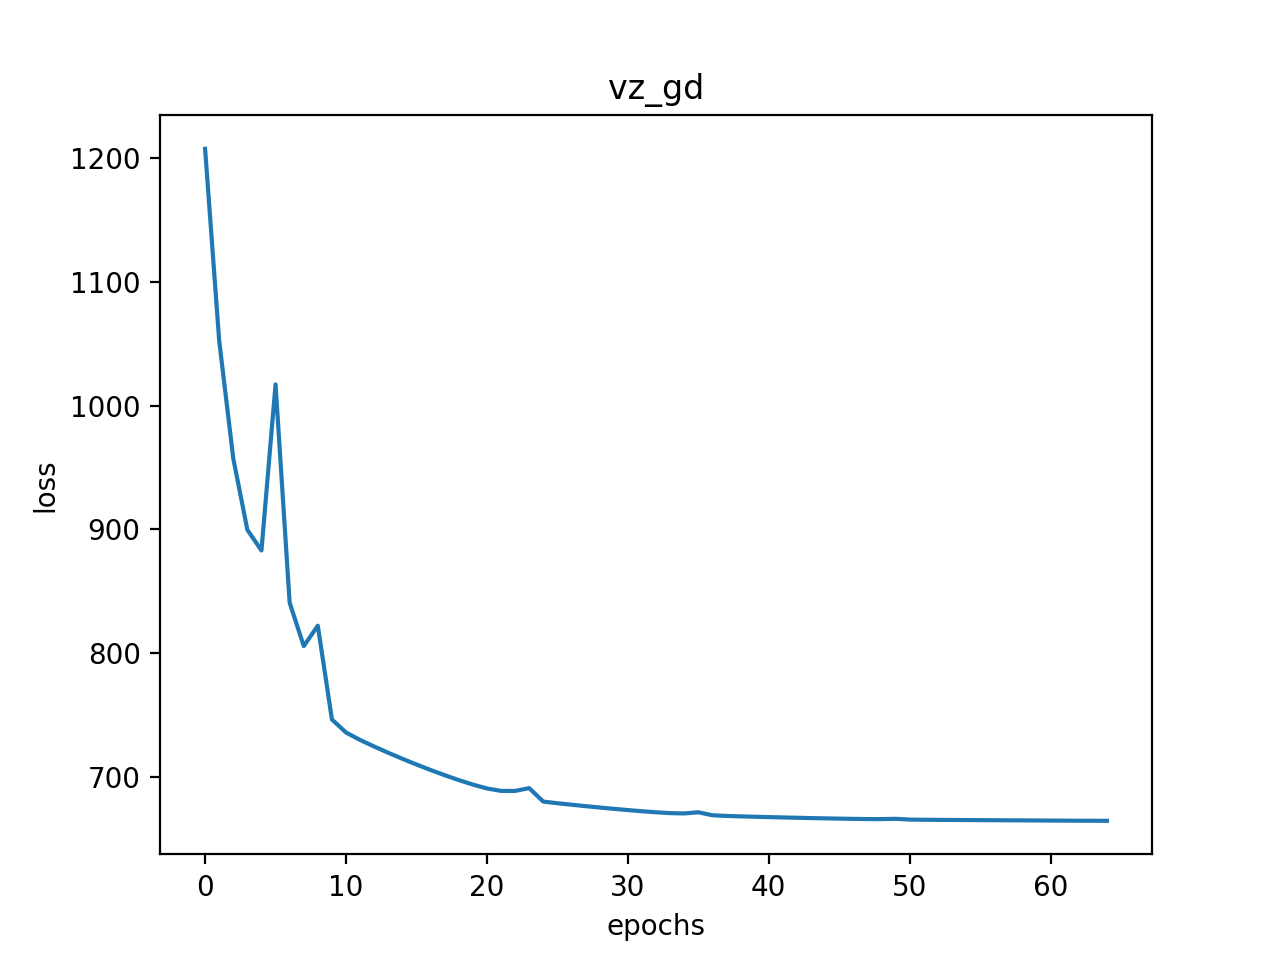

<IPython.core.display.Javascript object>


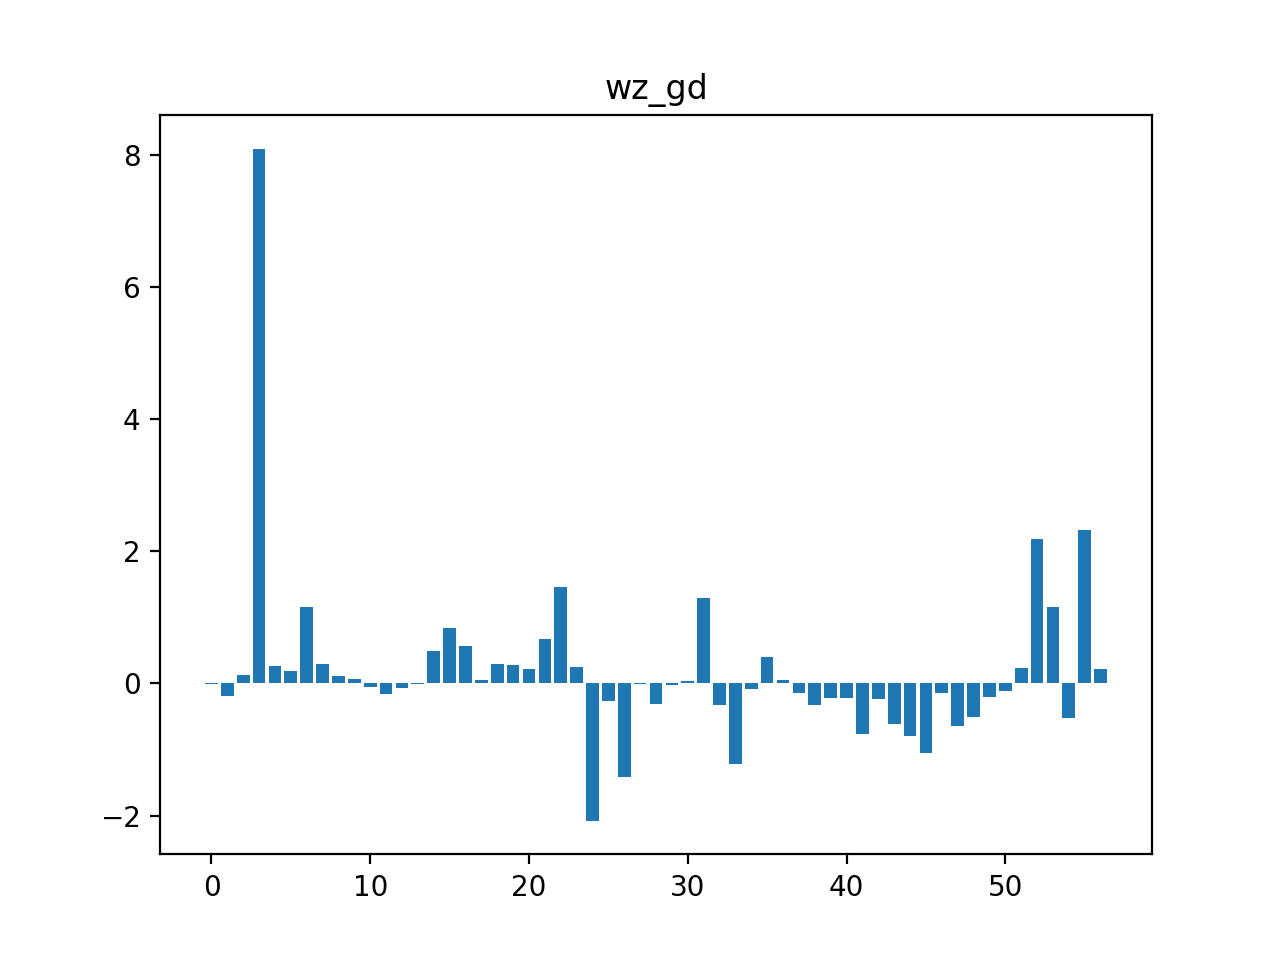

<IPython.core.display.Javascript object>


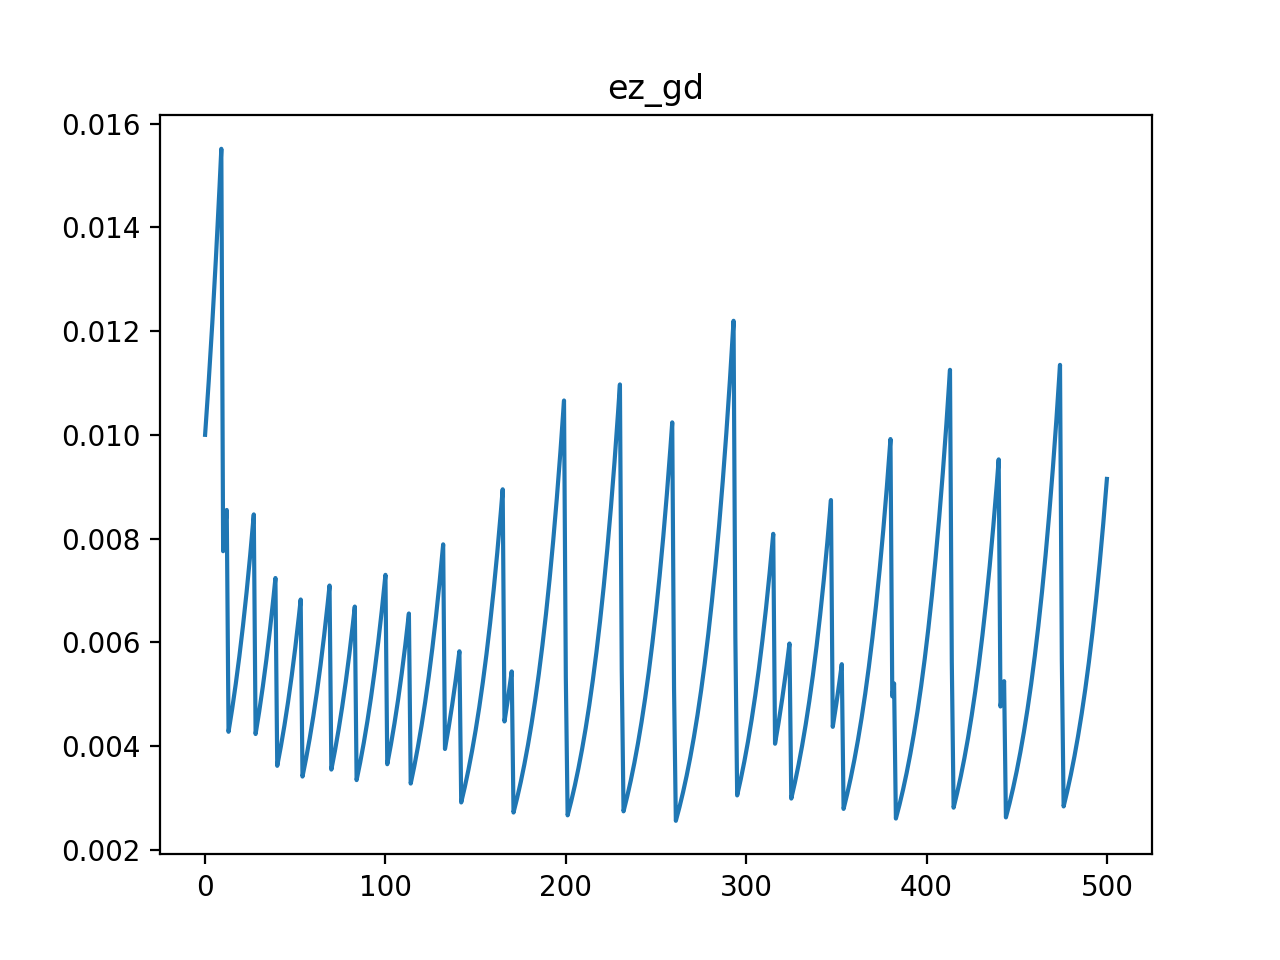

Text(0.5, 1.0, 'ez_gd')

In [18]:
# look at how gradient descent made progess

nextplot()
plt.plot(vz_gd[5:70])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('vz_gd')

nextplot()
plt.bar(range(0,57), wz_gd)
plt.title('wz_gd')

nextplot()
plt.plot(ez_gd)
plt.title('ez_gd')


## 2d Stochastic gradient descent

In [19]:
def sgdepoch(y, X, w, eps):
    """Run one SGD epoch and return the updated weight vector. """
    # Run N stochastic gradient steps (without replacement). Do not rescale each
    # step by factor N (i.e., proceed differently than in the lecture slides).
    
    temp = np.arange(0,len(X))
    np.random.shuffle(temp)
    for i in temp:
        w += eps * (y[i] - sigma(np.dot(w,X[i,]))) * X[i,]
    return w
    
    #e = [y[i] - sigma(np.dot(w, X[i])) for i in range(len(y))]
    
#    N, D = X.shape

    # print(N)
    # print(D)


    #Z = np.arange(0, N)
   #np.random.shuffle(Z)
    
#    temp = np.arange(0,len(X))
 #   np.random.shuffle(temp)

  #  for z in Z:
#        w += eps * dl(y[z], X[z,:], w)        
 #       w += eps * (y[z] - sigma(np.dot(w,X[z,]))) * X[z,]

#    return w



In [33]:
# when you run this multiple times, with 50% probability you should get the
# following result (there is one other result which is very close):
# array([ -3.43689655e+02,  -1.71161311e+02,  -5.71093536e+02,
#         -5.16478220e+01,   4.66294348e+02,  -3.71589878e+02,
#          5.21493183e+02,   1.25699230e+03,   8.33804130e+02,
#          5.63185399e+02,   1.32761302e+03,  -2.64104011e+02,
#          7.10693307e+02,  -1.75497331e+02,  -1.94174427e+02,
#          1.11641507e+02,  -3.30817509e+02,  -3.46754913e+02,
#          8.48722111e+02,  -1.89136304e+02,  -4.25693844e+02,
#         -1.23084189e+02,  -2.95894797e+02,  -2.35789333e+02,
#         -3.38695243e+02,  -3.05642830e+02,  -2.28975383e+02,
#         -2.38075137e+02,  -1.66702530e+02,  -2.27341599e+02,
#         -1.77575620e+02,  -1.49093855e+02,  -1.70028859e+02,
#         -1.50243833e+02,  -1.82986008e+02,  -2.41143708e+02,
#         -3.31047159e+02,  -5.79991185e+01,  -1.98477863e+02,
#         -1.91264948e+02,  -1.17371919e+02,  -1.66953779e+02,
#         -2.01472565e+02,  -1.23330949e+02,  -3.00857740e+02,
#         -1.95853348e+02,  -7.44868073e+01,  -1.11172370e+02,
#         -1.57618226e+02,  -1.25729512e+00,  -1.45536466e+02,
#         -1.43362438e+02,  -3.00429708e+02,  -9.84391082e+01,
#         -4.54152047e+01,  -5.26492232e+01,  -1.45175427e+02])
sgdepoch(y[1:3], Xz[1:3, :], np.linspace(-5, 5, D), 1000)

<ipython-input-19-6692d5077bf1>:4: RuntimeWarning: overflow encountered in exp
  return (np.exp(x)/(1+np.exp(x)))
<ipython-input-19-6692d5077bf1>:4: RuntimeWarning: invalid value encountered in double_scalars
  return (np.exp(x)/(1+np.exp(x)))


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan])

In [20]:
# define the objective and update function for one gradient-descent epoch for
# fitting an MLE estimate of logistic regression with stochastic gradient descent
# (should return a tuple of two functions; see optimize)
def sgd(y, X):
    def objective(w):
        return -l(y, X, w)

    def update(w, eps):
        return sgdepoch(y, X, w, eps)

    return (objective, update)

In [35]:
# with 50% probability, you should get:
# [40.864973045695081,
#  array([ -3.43689655e+02,  -1.71161311e+02,  -5.71093536e+02,
#          -5.16478220e+01,   4.66294348e+02,  -3.71589878e+02,
#           5.21493183e+02,   1.25699230e+03,   8.33804130e+02,
#           5.63185399e+02,   1.32761302e+03,  -2.64104011e+02,
#           7.10693307e+02,  -1.75497331e+02,  -1.94174427e+02,
#           1.11641507e+02,  -3.30817509e+02,  -3.46754913e+02,
#           8.48722111e+02,  -1.89136304e+02,  -4.25693844e+02,
#          -1.23084189e+02,  -2.95894797e+02,  -2.35789333e+02,
#          -3.38695243e+02,  -3.05642830e+02,  -2.28975383e+02,
#          -2.38075137e+02,  -1.66702530e+02,  -2.27341599e+02,
#          -1.77575620e+02,  -1.49093855e+02,  -1.70028859e+02,
#          -1.50243833e+02,  -1.82986008e+02,  -2.41143708e+02,
#          -3.31047159e+02,  -5.79991185e+01,  -1.98477863e+02,
#          -1.91264948e+02,  -1.17371919e+02,  -1.66953779e+02,
#          -2.01472565e+02,  -1.23330949e+02,  -3.00857740e+02,
#          -1.95853348e+02,  -7.44868073e+01,  -1.11172370e+02,
#          -1.57618226e+02,  -1.25729512e+00,  -1.45536466e+02,
#          -1.43362438e+02,  -3.00429708e+02,  -9.84391082e+01,
#          -4.54152047e+01,  -5.26492232e+01,  -1.45175427e+02])]
f, update = sgd(y[1:3], Xz[1:3, :])
[f(np.linspace(-5, 5, D)), update(np.linspace(-5, 5, D), 1000)]

<ipython-input-19-6692d5077bf1>:4: RuntimeWarning: overflow encountered in exp
  return (np.exp(x)/(1+np.exp(x)))
<ipython-input-19-6692d5077bf1>:4: RuntimeWarning: invalid value encountered in double_scalars
  return (np.exp(x)/(1+np.exp(x)))


[40.864973045695095,
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan])]

In [21]:
# you can run stochastic gradient descent!
wz_sgd, vz_sgd, ez_sgd = optimize(sgd(y, Xz), w0, nepochs=500)

Epoch   0: f=  6636.208, eps=0.010000000
Epoch   1: f=   966.084, eps=0.010500000
Epoch   2: f=   786.742, eps=0.011025000
Epoch   3: f=   739.079, eps=0.011576250
Epoch   4: f=   718.445, eps=0.012155063
Epoch   5: f=   709.595, eps=0.012762816
Epoch   6: f=   696.189, eps=0.013400956
Epoch   7: f=   701.715, eps=0.006700478
Epoch   8: f=   686.522, eps=0.007035502
Epoch   9: f=   683.800, eps=0.007387277
Epoch  10: f=   684.599, eps=0.003693639
Epoch  11: f=   680.060, eps=0.003878321
Epoch  12: f=   679.315, eps=0.004072237
Epoch  13: f=   678.263, eps=0.004275848
Epoch  14: f=   677.648, eps=0.004489641
Epoch  15: f=   676.835, eps=0.004714123
Epoch  16: f=   676.035, eps=0.004949829
Epoch  17: f=   676.689, eps=0.002474914
Epoch  18: f=   675.247, eps=0.002598660
Epoch  19: f=   674.591, eps=0.002728593
Epoch  20: f=   674.154, eps=0.002865023
Epoch  21: f=   673.749, eps=0.003008274
Epoch  22: f=   673.414, eps=0.003158688
Epoch  23: f=   673.128, eps=0.003316622
Epoch  24: f=   

Epoch 201: f=   664.944, eps=0.001269230
Epoch 202: f=   664.949, eps=0.000634615
Epoch 203: f=   664.933, eps=0.000666346
Epoch 204: f=   664.922, eps=0.000699663
Epoch 205: f=   664.913, eps=0.000734646
Epoch 206: f=   664.905, eps=0.000771379
Epoch 207: f=   664.897, eps=0.000809948
Epoch 208: f=   664.891, eps=0.000850445
Epoch 209: f=   664.881, eps=0.000892967
Epoch 210: f=   664.875, eps=0.000937616
Epoch 211: f=   664.868, eps=0.000984496
Epoch 212: f=   664.861, eps=0.001033721
Epoch 213: f=   664.852, eps=0.001085407
Epoch 214: f=   664.847, eps=0.001139678
Epoch 215: f=   664.845, eps=0.001196661
Epoch 216: f=   664.828, eps=0.001256494
Epoch 217: f=   664.817, eps=0.001319319
Epoch 218: f=   664.833, eps=0.000659660
Epoch 219: f=   664.817, eps=0.000692643
Epoch 220: f=   664.801, eps=0.000727275
Epoch 221: f=   664.790, eps=0.000763638
Epoch 222: f=   664.784, eps=0.000801820
Epoch 223: f=   664.773, eps=0.000841911
Epoch 224: f=   664.768, eps=0.000884007
Epoch 225: f=   

Epoch 401: f=   663.739, eps=0.000676597
Epoch 402: f=   663.733, eps=0.000710427
Epoch 403: f=   663.733, eps=0.000355213
Epoch 404: f=   663.727, eps=0.000372974
Epoch 405: f=   663.722, eps=0.000391623
Epoch 406: f=   663.716, eps=0.000411204
Epoch 407: f=   663.713, eps=0.000431764
Epoch 408: f=   663.708, eps=0.000453352
Epoch 409: f=   663.705, eps=0.000476020
Epoch 410: f=   663.702, eps=0.000499821
Epoch 411: f=   663.698, eps=0.000524812
Epoch 412: f=   663.695, eps=0.000551053
Epoch 413: f=   663.690, eps=0.000578605
Epoch 414: f=   663.687, eps=0.000607536
Epoch 415: f=   663.682, eps=0.000637912
Epoch 416: f=   663.679, eps=0.000669808
Epoch 417: f=   663.673, eps=0.000703298
Epoch 418: f=   663.669, eps=0.000738463
Epoch 419: f=   663.663, eps=0.000775386
Epoch 420: f=   663.660, eps=0.000814156
Epoch 421: f=   663.655, eps=0.000854863
Epoch 422: f=   663.648, eps=0.000897607
Epoch 423: f=   663.644, eps=0.000942487
Epoch 424: f=   663.638, eps=0.000989611
Epoch 425: f=   

## 2e Compare GD and SGD

<IPython.core.display.Javascript object>


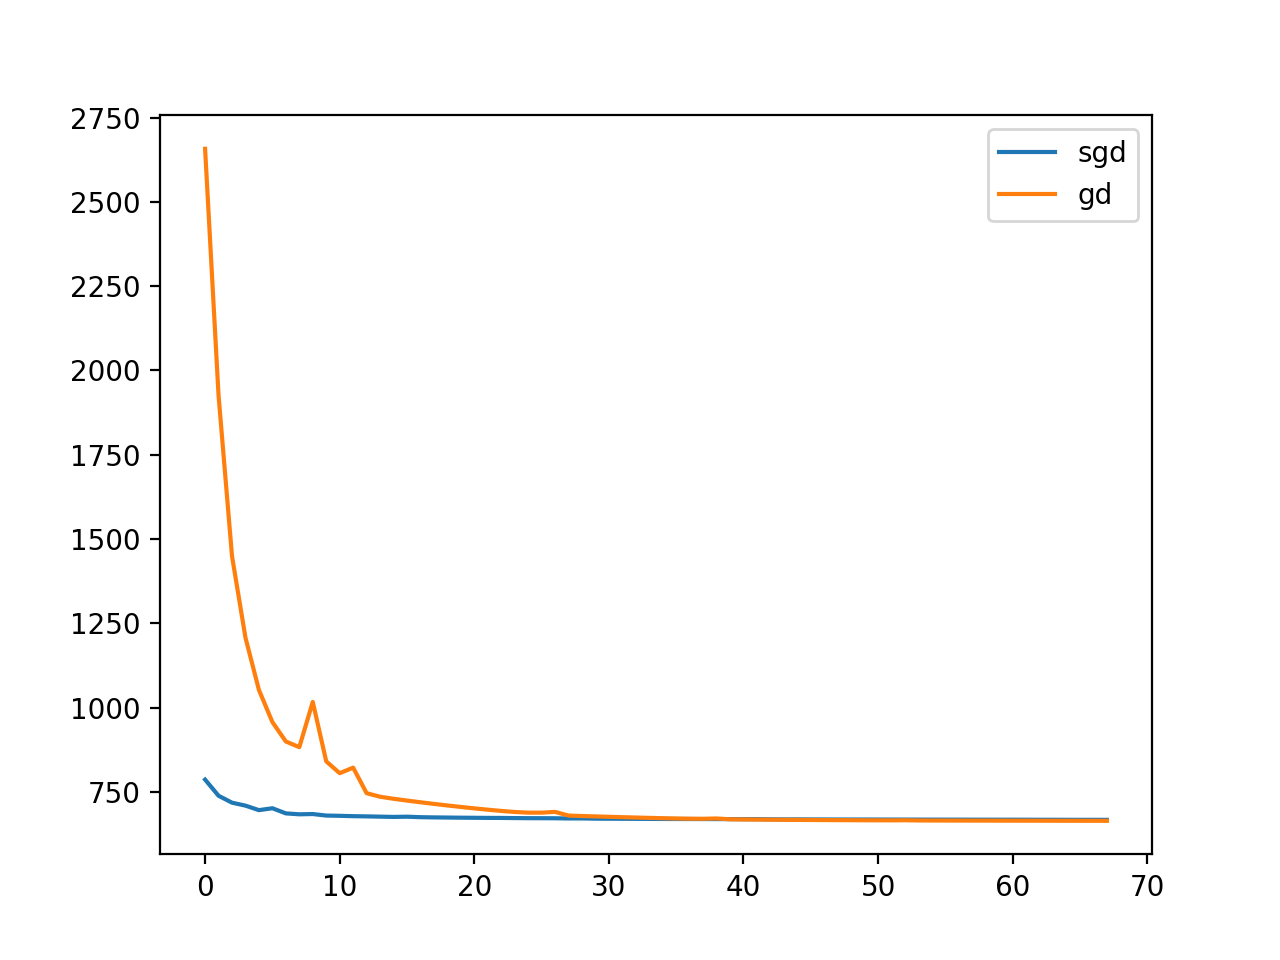

In [37]:
nextplot()
plt.plot(vz_sgd[2:70], label='sgd')
plt.plot(vz_gd[2:70], label='gd')
plt.legend()

# 3 Prediction

In [24]:
def predict(Xtest, w):
    """Returns vector of predicted confidence values for logistic regression with
weight vector w."""
    return sigma(np.dot(Xtest, w))


def classify(Xtest, w):
    """Returns 0/1 vector of predicted class labels for logistic regression with
weight vector w."""
    return np.round(predict(Xtest, w))

In [25]:
# Example: confusion matrix
yhat = predict(Xtestz, wz_gd)
print(yhat)
ypred = classify(Xtestz, wz_gd)
ypred
print(sklearn.metrics.confusion_matrix(ytest, ypred))  # true x predicted

[0.55163063 0.99999985 0.99986389 ... 0.33431151 0.02959437 0.03069638]
[[887  54]
 [ 71 524]]


In [26]:
# Example: classification report
print(sklearn.metrics.classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       941
           1       0.91      0.88      0.89       595

    accuracy                           0.92      1536
   macro avg       0.92      0.91      0.91      1536
weighted avg       0.92      0.92      0.92      1536



<IPython.core.display.Javascript object>


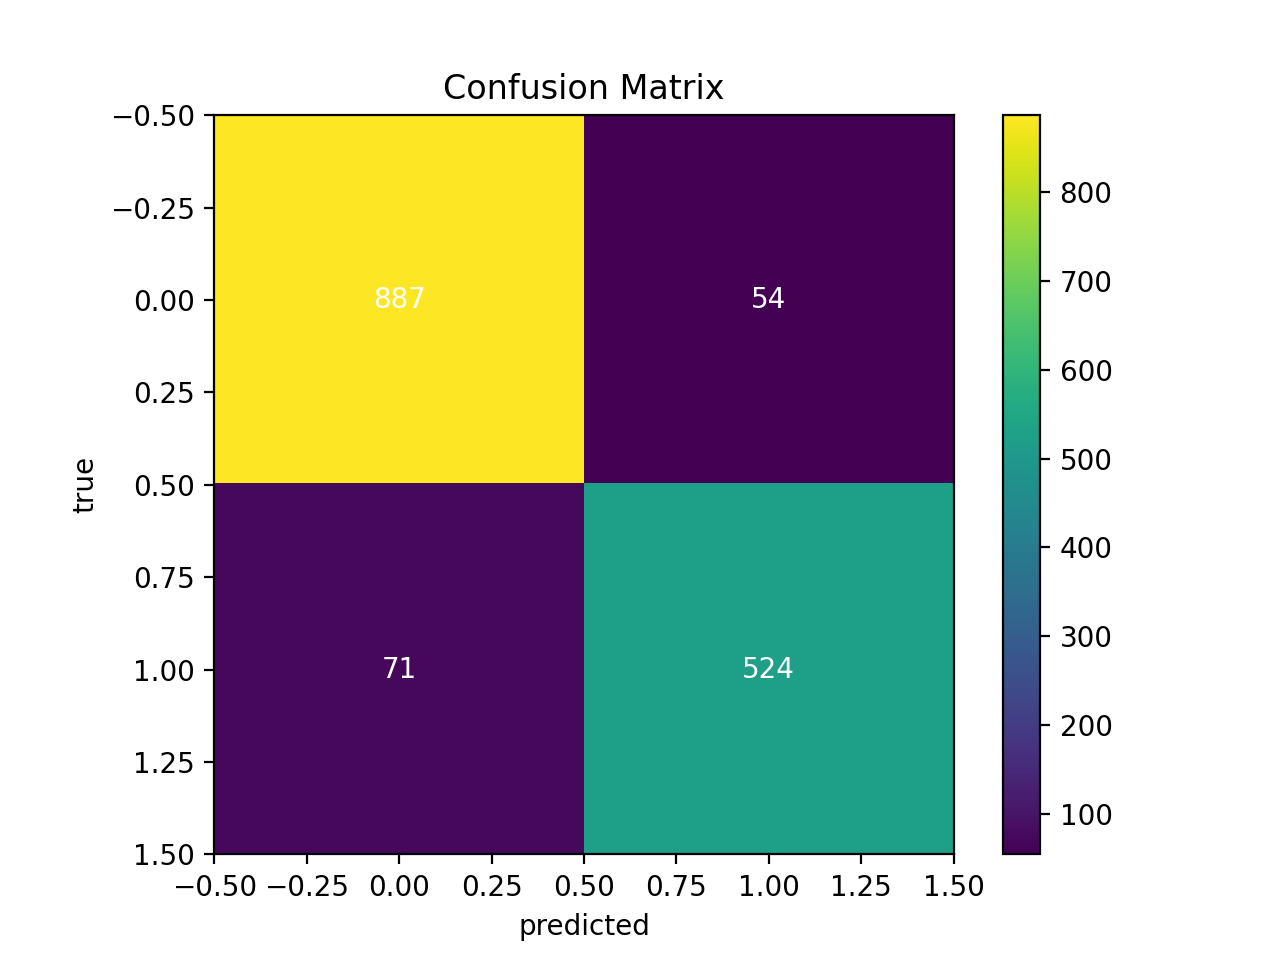

In [27]:
nextplot()
M = sklearn.metrics.confusion_matrix(ytest, ypred)
plt.imshow(M, origin="upper")
for ij, v in np.ndenumerate(M):
    i, j = ij
    plt.text(j, i, str(v), color="white", ha="center", va="center")
plt.xlabel("predicted")
plt.ylabel("true")
plt.title('Confusion Matrix')
plt.colorbar()

<IPython.core.display.Javascript object>


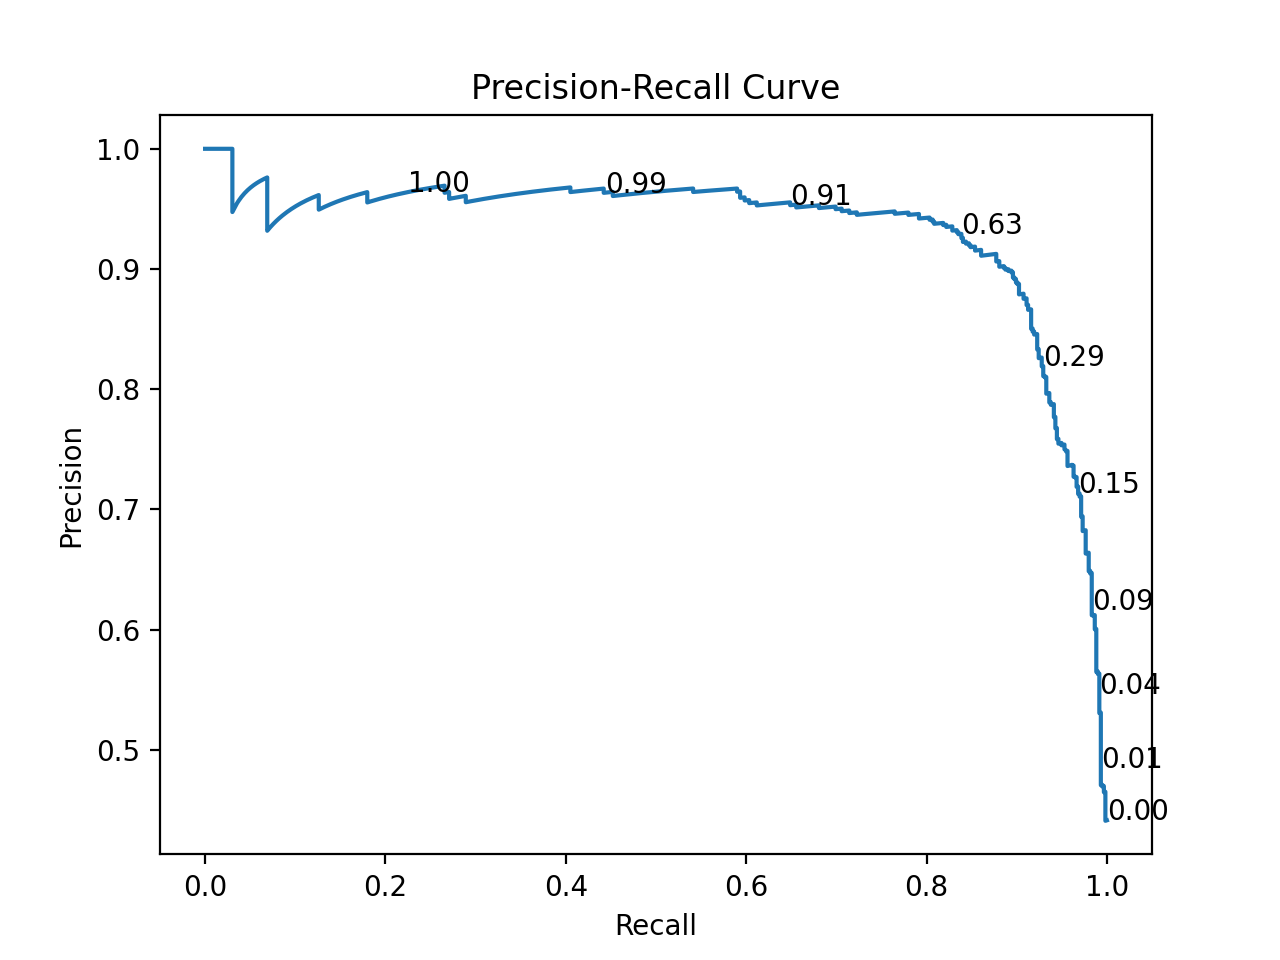

Text(0.5, 1.0, 'Precision-Recall Curve')

In [28]:
# Example: precision-recall curve (with annotated thresholds)
nextplot()
precision, recall, thresholds = sklearn.metrics.precision_recall_curve(ytest, yhat)
plt.plot(recall, precision)
for x in np.linspace(0, 1, 10, endpoint=False):
    index = int(x * (precision.size - 1))
    plt.text(recall[index], precision[index], "{:3.2f}".format(thresholds[index]))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title('Precision-Recall Curve')

<IPython.core.display.Javascript object>


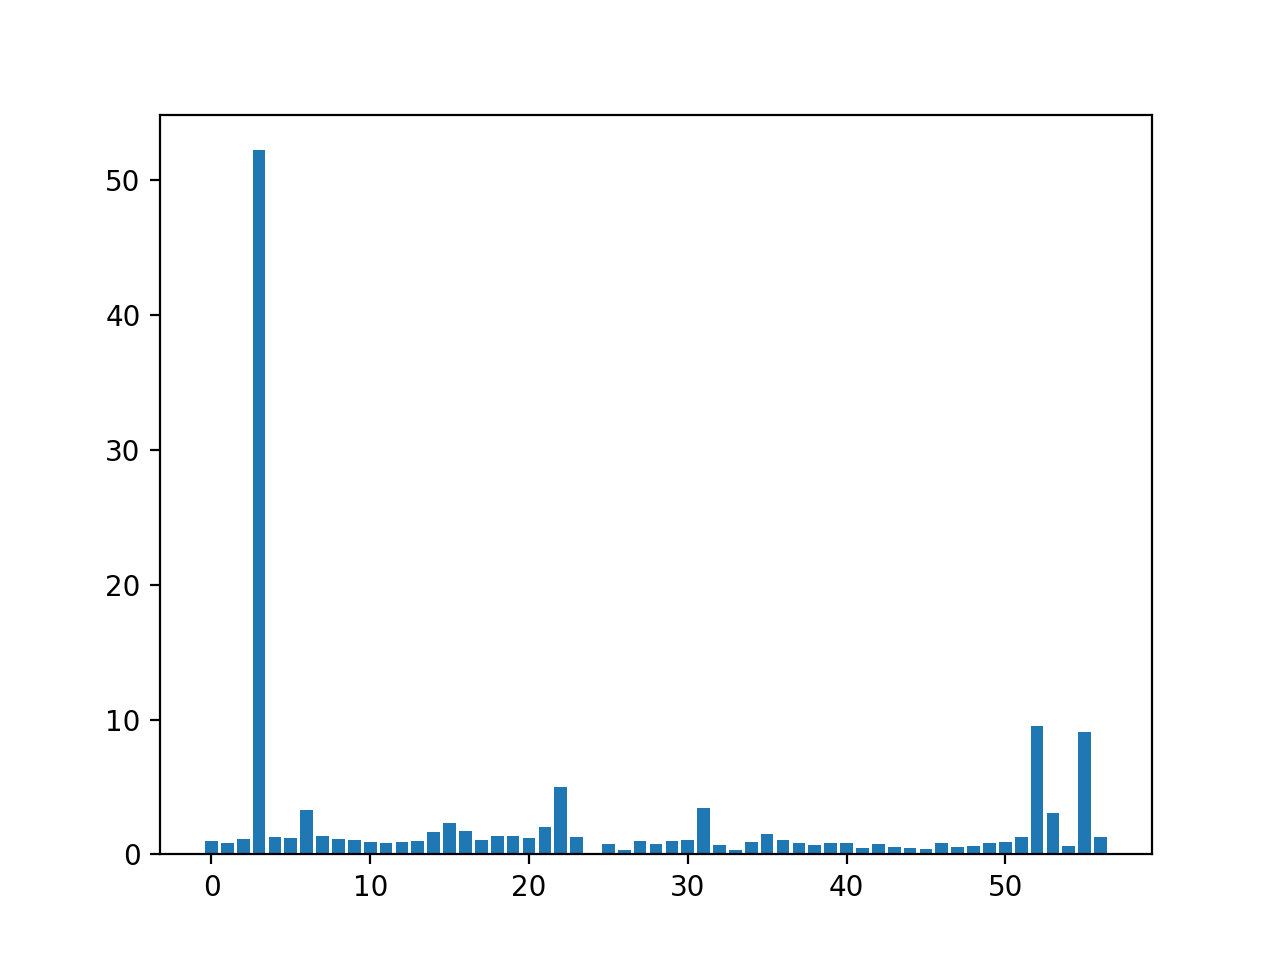

<BarContainer object of 57 artists>

In [29]:
# Explore which features are considered importpant
# YOUR CODE HERE

x = [range(0,57)]
#x-0.1
#X = df.female.values.reshape(200,1)
nextplot()
#plt.bar(x, wz_gd, label='GD')
#plt.bar(x, wz_sgd, label='SGD')
#plt.ylim(0, 5)
#plt.legend()
plt.bar(range(0,57), np.exp(wz_sgd))
#plt.bar(range(0,57), np.exp(wz_gd))

# 4 Maximum Aposteriori Estimation

## 4a Gradient Descent

In [95]:
def l_l2(y, X, w, lambda_):
    """Log-density of posterior of logistic regression with weights w and L2
regularization parameter lambda_"""
    return np.subtract(l(y, X, w), np.dot((lambda_/2), (numpy.linalg.norm(w))**2))

In [96]:
# this should give:
# [-47066.641667825766, -47312.623810682911]
[l_l2(y, Xz, np.linspace(-5, 5, D), 0), l_l2(y, Xz, np.linspace(-5, 5, D), 1)]

[-47066.64166782577, -47312.62381068291]

In [ ]:
def dl_l2(y, X, w, lambda_):
    """Gradient of log-density of posterior of logistic regression with weights w
and L2 regularization parameter lambda_."""
    # YOUR CODE HERE

In [ ]:
# this should give:
# [array([  551.33985842,   143.84116318,   841.83373606,   156.87237578,
#           802.61217579,   795.96202907,   920.69045803,   621.96516752,
#           659.18724769,   470.81259805,   771.32406968,   352.40325626,
#           455.66972482,   234.36600888,   562.45454038,   864.83981264,
#           787.19723703,   649.48042176,   902.6478154 ,   544.00539886,
#          1174.78638035,   120.3598967 ,   839.61141672,   633.30453444,
#          -706.66815087,  -630.2039816 ,  -569.3451386 ,  -527.50996698,
#          -359.53701083,  -476.64334832,  -411.60620464,  -375.11950586,
#          -345.37195689,  -376.22044258,  -407.31761977,  -456.23251936,
#          -596.86960184,  -107.97072355,  -394.82170044,  -229.18125598,
#          -288.46356547,  -362.13402385,  -450.87896465,  -277.03932676,
#          -414.99293368,  -452.28771693,  -167.54649092,  -270.9043748 ,
#          -252.20140951,  -357.72497343,  -259.12468742,   418.35938483,
#           604.54173228,    43.10390907,   152.24258478,   378.16731033,
#           416.12032881]),
#  array([  556.33985842,   148.66259175,   846.4765932 ,   161.33666149,
#           806.89789007,   800.06917193,   924.61902946,   625.71516752,
#           662.75867626,   474.20545519,   774.5383554 ,   355.43897054,
#           458.52686767,   237.04458031,   564.95454038,   867.16124121,
#           789.34009417,   651.44470748,   904.43352968,   545.61254171,
#          1176.21495178,   121.6098967 ,   840.68284529,   634.19739158,
#          -705.95386516,  -629.66826731,  -568.98799574,  -527.33139555,
#          -359.53701083,  -476.82191975,  -411.9633475 ,  -375.65522015,
#          -346.08624261,  -377.11329972,  -408.38904835,  -457.48251936,
#          -598.29817327,  -109.57786641,  -396.60741472,  -231.14554169,
#          -290.60642261,  -364.45545242,  -453.37896465,  -279.71789819,
#          -417.85007654,  -455.32343122,  -170.76077664,  -274.29723194,
#          -255.77283808,  -361.47497343,  -263.05325885,   414.25224198,
#           600.25601799,    38.63962335,   147.59972763,   373.34588176,
#           411.12032881])]
[dl_l2(y, Xz, np.linspace(-5, 5, D), 0), dl_l2(y, Xz, np.linspace(-5, 5, D), 1)]

In [ ]:
# now define the (f,update) tuple for optimize for logistic regression, L2
# regularization, and gradient descent
def gd_l2(y, X, lambda_):
    # YOUR CODE HERE

In [ ]:
# let's run!
lambda_ = 100
wz_gd_l2, vz_gd_l2, ez_gd_l2 = optimize(gd_l2(y, Xz, lambda_), w0, nepochs=500)

## 4b Effect of Prior

In [ ]:
# YOUR CODE HERE

## 4c Composition of Weight Vector

In [ ]:
# YOUR CODE HERE

## 5 Exploration (optional)

### 5 Exploration: PyTorch

In [ ]:
# if you want to experiment, here is an implementation of logistic
# regression in PyTorch
import math
import torch
import torch.nn as nn
import torch.utils.data
import torch.nn.functional as F

# prepare the data
Xztorch = torch.FloatTensor(Xz)
ytorch = torch.LongTensor(y)
train = torch.utils.data.TensorDataset(Xztorch, ytorch)


# manual implementation of logistic regression (without bias)
class LogisticRegression(nn.Module):
    def __init__(self, D, C):
        super(LogisticRegression, self).__init__()
        self.weights = torch.nn.Parameter(
            torch.randn(D, C) / math.sqrt(D)
        )  # xavier initialization
        self.register_parameter("W", self.weights)

    def forward(self, x):
        out = torch.matmul(x, self.weights)
        out = F.log_softmax(out)
        return out


# define the objective and update function. here we ignore the learning rates
# and parameters given to us by optimize (they are stored in the PyTorch model
# and optimizer, resp., instead)
def opt_pytorch():
    model = LogisticRegression(D, 2)
    criterion = nn.NLLLoss(reduction="sum")
    # change the next line to try different optimizers
    # optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    def objective(_):
        outputs = model(Xztorch)
        return criterion(outputs, ytorch)

    def update(_1, _2):
        for i, (examples, labels) in enumerate(train_loader):
            outputs = model(examples)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        W = model.state_dict()["W"]
        w = W[:, 1] - W[:, 0]
        return w

    return (objective, update)

In [ ]:
# run the optimizer
learning_rate = 0.01
batch_size = 100  # number of data points to sample for gradient estimate
shuffle = True  # sample with replacement (false) or without replacement (true)

train_loader = torch.utils.data.DataLoader(train, batch_size, shuffle=True)
wz_t, vz_t, _ = optimize(opt_pytorch(), None, nepochs=100, eps0=None, verbose=True)